## Import the Required Dependencies

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Loading weights and configuration file for yolov4
1. **'modelConfiguration' specifies the configuration file (yolov4-tiny.cfg)** that contains the architecture of the model, including the number of layers, filters, and other parameters.
2. **'modelWeights' specifies the pre-trained weights file (yolov4-tiny.weights)** that contains the learned parameters of the model. 

In [2]:
#read the wieghts and cfg file openCv , readNet function automatically detects an origin framework of a 
#trained model(readNetFromCaffe, readNetFromTensorflow, readNetFromTorch, or readNetFromDarknet).
net = cv2.dnn.readNet(r"C:\Users\uzair\Documents\Yolo_Model\dnn_model\yolov4-tiny.weights",
                      r"C:\Users\uzair\Documents\Yolo_Model\dnn_model\yolov4-tiny.cfg")
model = cv2.dnn_DetectionModel(net)
model.setInputParams(size = (320,320),scale = 1/255)


#### Read the file that contain the name of different classes(objects name)

In [3]:
classes = []
with open(r"C:\Users\uzair\Documents\Yolo_Model\dnn_model\classes.txt","r") as file_object:
    for class_name in file_object.readlines():
        class_name = class_name.strip()
        classes.append(class_name)
print(classes)


['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


##### Read the image and video file and also set the dimension of video frame


### For image

### For video

In [27]:
# Load the input image
image = cv2.imread(r"C:\Users\uzair\Documents\Yolo_Model\image.jpg")

In [28]:
# Load the list of class names and define colors for different classes
classes = []
class_colors = []
with open(r"C:\Users\uzair\Documents\Yolo_Model\dnn_model\classes.txt", "r") as file_object:
    for idx, class_name in enumerate(file_object.readlines()):
        class_name = class_name.strip()
        classes.append(class_name)
        # Generate a random color for each class
        color = np.random.randint(0, 255, size=(3,))
        class_colors.append(tuple(map(int, color)))

In [29]:
# Detect objects in the image
(class_ids, scores, bboxes) = model.detect(image)

# Loop through the detected objects
for class_id, score, bbox in zip(class_ids, scores, bboxes):
    (x, y, w, h) = bbox
    # Get the color for the current class
    color = class_colors[class_id]
    # Draw bounding boxes around the detected objects with the color for the current class
    cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
    class_name = classes[class_id]
    # Draw class names above the bounding boxes with the color for the current class
    cv2.putText(image, class_name, (x, y - 10), cv2.FONT_HERSHEY_PLAIN, 2, color, 2)

# Display the image with the drawn bounding boxes and class names
cv2.imshow("Image", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

([], [])

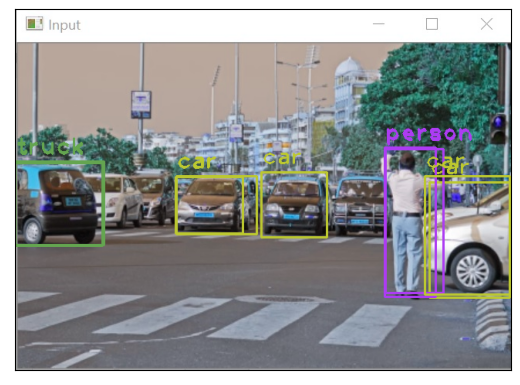

In [33]:
plt.imshow(image)
plt.xticks([])
plt.yticks([])

#### Draw the bbox and file name on video's objects

In [6]:
# cap = cv2.VideoCapture(r"C:\Users\uzair\Documents\Yolo_Model\video.mp4")
# # setting the dimension
# cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
# cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)


In [ ]:
# #as long as frame in the model
# while True:
#     #get frames
#     ret,frame = cap.read()
#     #get the bbox etc
#     (class_ids, scores, bboxes) = model.detect(frame)
#     for class_id, score, bbox in zip(class_ids, scores, bboxes):
#         (x, y, w, h) = bbox
#         #blue bbox
#         cv2.rectangle(frame,(x,y),(x + w,y + h),(200,10,50),3)
#         class_name = classes[class_id]
#         #blue text
#         cv2.putText(frame, (class_name),(x,y-10),cv2.FONT_HERSHEY_PLAIN,2,(200,10,50),2)
#         cv2.rectangle(frame,(x,y),(x+w,y+h),(200,10,50),3)
#     print('classs',class_ids)
#     print('scores',scores)
#     print('bboxes',bboxes) 
    

#     cv2.imshow("Frame",frame)    
#     key = cv2.waitKey(10)
    
#     if key == 27:
#         break

# cap.release()
# cv2.destroyAllWindows()